In [18]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Masking,Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed,MaxPooling1D, Flatten, Conv1D,Conv2D,Dropout, MaxPooling2D, GRU # for creating layers inside the Neural Network
from keras.optimizers import Adam , SGD
from keras import metrics
from keras.utils import plot_model
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import numpy.ma as ma
# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.model_selection import train_test_split
# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version
from matplotlib import pyplot as plt

#file accessing
import os
# time stuff
from datetime import timedelta
import calendar


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.4
sklearn: 1.1.1
plotly: 5.9.0


In [19]:
df=pd.read_csv('InSAR_data_south/displacement/export_dataframe1.csv')
df=df.set_index([df.columns[0],df.columns[1]])
df.columns=pd.to_datetime(df.columns, format='%Y%m%d')
df=df.dropna(axis=0, how='all')#drop full nan rows
df

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-120.9146 35.4470          0.0    -13.5180    0.747460      5.0862   
          35.4490          0.0    -13.6410    0.063185      4.4150   
          35.4510          0.0    -13.6300    0.400600      4.7172   
          35.4530          0.0    -13.5690   -0.500240      4.0645   
          35.4550          0.0    -13.5060   -1.107300      2.9022   
...                        ...         ...         ...         ...   
-117.6414 37.6236          0.0      4.8278   -1.306500         NaN   
          37.6256          0.0      4.8698   -1.213700         NaN   
          37.6276          0.0      4.8693   -1.189300         NaN   
          37.6296          0.0      4.8277   -1.190600         NaN   
          37.6316          0.0      4.8729   -1.120000         NaN   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-120.9146 35.4470      -1.9668     1.29470     -5.1067     0.87440   
          35.4490      -2.5803     0.74781     -5.7172     0.19724   
          35.4510      -2.3308     0.99271     -5.4875     0.39402   
          35.4530      -2.8942     0.21585     -6.1191     0.00391   
          35.4550      -4.1777    -1.13510     -7.3587    -1.35330   
...                        ...         ...         ...         ...   
-117.6414 37.6236      -4.1515    -1.99990      9.9914    -3.10550   
          37.6256      -4.1588    -1.73720     10.4130    -2.95840   
          37.6276      -4.1632    -1.71070     10.4830    -2.93180   
          37.6296      -4.1240    -1.89490     10.1870    -3.01790   
          37.6316      -4.1457    -1.70330     10.5180    -2.92690   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-120.9146 35.4470     -5.15400     2.55900  ...     -6.5221     -3.3514   
          35.4490     -5.74300     1.93390  ...     -7.3692     -4.3340   
          35.4510     -5.48650     2.15280  ...     -6.8486     -4.0115   
          35.4530     -5.82860     1.83380  ...     -5.6745     -3.0299   
          35.4550     -7.29700     0.46061  ...     -7.9927     -5.4295   
...                        ...         ...  ...         ...         ...   
-117.6414 37.6236     -0.32799     6.98990  ...      8.5800     11.3410   
          37.6256     -0.33838     7.34020  ...      9.2515     11.9960   
          37.6276     -0.34454     7.39780  ...      8.8321     11.5700   
          37.6296     -0.31614     7.12450  ...     10.3320     13.0730   
          37.6316     -0.33153     7.38390  ...      9.3376     12.0530   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-120.9146 35.4470      -4.1662     -6.3219     -11.361     -9.6235   
          35.4490      -5.1182     -7.1733     -12.311    -10.5640   
          35.4510      -4.7786     -6.7119     -11.929    -10.1480   
          35.4530      -3.7675     -5.5943     -10.838     -9.0944   
          35.4550      -6.2580     -7.9820     -13.136    -11.3610   
...                        ...         ...         ...         ...   
-117.6414 37.6236       5.5704      7.6113      17.002      9.6014   
          37.6256       6.0621      8.2387      17.526      9.5942   
          37.6276       5.5897      7.8226      17.066      9.2927   
          37.6296       7.2137      9.3699      18.582     10.8610   
          37.6316       6.0863      8.3323      17.499      9.8190   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-120.9146 35.4470      -4.9249     -3.5976     -5.1346     -4.4193  
          35.4490      -5.7429     -4.3201     -5.8205     -5.0144  
          35.4510      -5.1576     

In [20]:
df9=pd.read_csv('InSAR_data_south/displacement/rain_matching_InSar_dimension.csv')
df9.isnull().sum().sum()

0

In [21]:
df2=pd.read_csv('InSAR_data_south/displacement/groundwater.csv')
df2=df2.set_index([df2.columns[0],df2.columns[1]])
df2.columns=pd.to_datetime(df2.columns, format='%Y-%m-%d')
df2=df2.dropna(axis=0, how='all')#drop full nan rows
for y in range(df.columns.size):# includes all dates and adds nans
    if df.columns[y] != df2.columns[y]: #if column is misssing insert it
        df2.insert(loc=y,column=df.columns[y],value=np.nan*11286,allow_duplicates=False)
df2

,,2014-11-08,2014-12-02,2014-12-26,2015-02-12,2015-03-08,2015-04-01,2015-04-25,2015-05-19,2015-06-12,2015-07-06,...,2018-10-18,2018-10-30,2018-11-11,2018-11-17,2018-11-23,2018-12-05,2018-12-17,2018-12-29,2019-01-10,2019-01-22
Longitude,Latitude,,,,,,,,,,,,,,,,,,,,,
-120.9486,37.6316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.653992,75.813688,75.973384,76.0,NaN,NaN,NaN,NaN,NaN,NaN
-120.8926,36.7114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-120.8846,36.6994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-120.8746,36.6874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-120.1368,35.6991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.898190,151.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-119.0351,36.3933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.978182,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-119.0271,36.3793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.978182,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-119.0571,36.4493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.978182,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
dftest2=df.iloc[df.index.get_level_values('Longitude')< -119.2 ]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Longitude')> -119.5]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')> 35.8]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')< 36]
dftest2



# dftest2=df.iloc[df.index.get_level_values('Longitude')< -119.78  ]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Longitude')> -120]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')> 36.4]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')< 36.5]
# dftest2
# dftest=df.iloc[df.index.get_level_values('Longitude')< -119.3  ]
# dftest=dftest.iloc[dftest.index.get_level_values('Longitude')> -119.4]
# dftest=dftest.iloc[dftest.index.get_level_values('Latitude')> 35.9]
# dftest=dftest.iloc[dftest.index.get_level_values('Latitude')< 36]
# dftest
# dftest3=df.iloc[df.index.get_level_values('Longitude')< -118.83 ]
# dftest3=dftest3.iloc[dftest3.index.get_level_values('Longitude')> -119 ]
# dftest3=dftest3.iloc[dftest3.index.get_level_values('Latitude')> 35.9  ]
# dftest3=dftest3.iloc[dftest3.index.get_level_values('Latitude')< 36	  ]
# dftest3
# dftest4=df.iloc[df.index.get_level_values('Longitude')< -119.1  ]
# dftest4=dftest4.iloc[dftest4.index.get_level_values('Longitude')> -119.2]
# dftest4=dftest4.iloc[dftest4.index.get_level_values('Latitude')> 35.4]
# dftest4=dftest4.iloc[dftest4.index.get_level_values('Latitude')< 35.5]
# dftest4
# # -120.3907	37.7234
# # -119.8049	36.0712
# dftest5=df.iloc[df.index.get_level_values('Longitude')< -119.9  ]
# dftest5=dftest5.iloc[dftest5.index.get_level_values('Longitude')> -120]
# dftest5=dftest5.iloc[dftest5.index.get_level_values('Latitude')> 36.2]
# dftest5=dftest5.iloc[dftest5.index.get_level_values('Latitude')< 36.4]
# dftest5
# dftest6=df.iloc[df.index.get_level_values('Longitude')< -120.17  ]
# dftest6=dftest6.iloc[dftest6.index.get_level_values('Longitude')> -120.3]
# dftest6=dftest6.iloc[dftest6.index.get_level_values('Latitude')> 36.4]
# dftest6=dftest6.iloc[dftest6.index.get_level_values('Latitude')< 36.6]
# for x in range(len(dftest6.iloc[: , -1].values)-1,-1,-1):
#     if dftest6.iloc[: , -1].values[x] <-11 or dftest6.iloc[: , -1].values[x] >-4:
#         dftest6.drop(index=dftest6.index[x], inplace=True)
# dftest=dftest.append(dftest2) dont allow dups
# dftest=dftest.append(dftest3)
# dftest=dftest.append(dftest4)
# dftest=dftest.append(dftest5)
# dftest=dftest.append(dftest6)

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-119.499  35.8011          0.0    -5.77110    0.638090   -0.004456   
          35.8031          0.0    -5.69480    0.717230    0.298760   
          35.8051          0.0    -5.71900    0.694180    0.167500   
          35.8071          0.0    -5.76040    0.642880    0.093803   
          35.8091          0.0    -5.78220    0.656960    0.111110   
...                        ...         ...         ...         ...   
-119.201  35.9832          0.0    -1.18230    0.067615   -1.067900   
          35.9852          0.0    -1.06050    0.267720   -1.710800   
          35.9872          0.0    -0.77075    0.628160   -0.738490   
          35.9912          0.0    -3.26610   -2.105700   -4.475300   
          35.9992          0.0    -1.64760   -0.344860    0.414560   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-119.499  35.8011      -2.0942     0.52317     -1.4582     -1.5687   
          35.8031      -1.8187     0.84485     -1.1546     -1.2506   
          35.8051      -1.9304     0.75726     -1.2651     -1.3268   
          35.8071      -2.0314     0.67954     -1.3708     -1.4194   
          35.8091      -1.9552     0.75094     -1.3108     -1.3721   
...                        ...         ...         ...         ...   
-119.201  35.9832      -2.3008    -3.01260     -4.6434     -7.4868   
          35.9852      -2.8636    -3.68310     -4.5140     -7.3040   
          35.9872      -2.0536    -2.91950     -3.7832     -6.5177   
          35.9912      -6.6427    -7.46050     -8.5468    -10.8610   
          35.9992      -1.2111    -1.67300     -2.5851     -5.1083   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-119.499  35.8011      -4.7548     -2.4789  ...     -17.447     -16.945   
          35.8031      -4.3641     -2.0771  ...     -15.968     -15.496   
          35.8051      -4.3847     -2.1223  ...     -15.604     -15.195   
          35.8071      -4.4493     -2.2187  ...     -15.307     -14.940   
          35.8091      -4.3358     -2.1315  ...     -15.248     -14.913   
...                        ...         ...  ...         ...         ...   
-119.201  35.9832      -7.1183     -9.2500  ...     -52.015     -51.465   
          35.9852      -6.9339     -9.2966  ...     -53.807     -53.241   
          35.9872      -5.8460     -7.7294  ...     -52.200     -51.622   
          35.9912      -9.5780    -12.0690  ...     -54.900     -54.351   
          35.9992      -5.0230     -6.7603  ...     -46.208     -45.784   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-119.499  35.8011      -16.932     -16.730     -17.330     -17.463   
          35.8031      -15.535     -15.331     -15.906     -16.059   
          35.8051      -15.284     -15.084     -15.648     -15.776   
          35.8071      -15.043     -14.846     -15.405     -15.528   
          35.8091      -15.032     -14.839     -15.396     -15.516   
...                        ...         ...         ...         ...   
-119.201  35.9832      -51.165     -50.899     -51.742     -50.805   
          35.9852      -52.938     -52.681     -53.504     -52.611   
          35.9872      -51.304     -51.054     -51.863     -51.039   
          35.9912      -54.128     -53.841     -54.603     -53.740   
          35.9992      -45.562     -45.231     -46.040     -45.152   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-119.499  35.8011      -15.569     -15.687     -16.619     -16.406  
          35.8031      -14.161     -14.259     -15.168     -14.930  
          35.8051      -13.911     

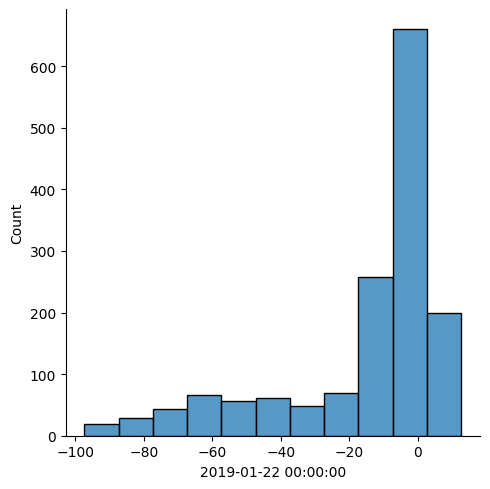

In [23]:
# dftest2=df.iloc[df.index.get_level_values('Longitude')< -118.9 ]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Longitude')> -119.7]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')> 35.5]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')< 36.1]
# dftest2
# for row in range(len(dftest2.index)-1,-1,-1):
#     if dftest2.index[row] not in df2.index:
#             dftest2.drop(index=dftest2.index[row], inplace=True)
# dftest2
import seaborn as sns
sns.displot( x=dftest2.iloc[: , -1], binwidth=10)

In [24]:
buckets = [0] * 100
import math
#math.modf(dftest2.iloc[: , -1].values[0])
#dftest2.iloc[: , -1].values[0]
for x in range(len(dftest2.iloc[: , -1].values)-1,-1,-1):
    r,l=math.modf(dftest2.iloc[: , -1].values[x])   
    if buckets[int(l)]>3:
        dftest2.drop(index=dftest2.index[x], inplace=True)
    else:
        buckets[int(l)]+=1


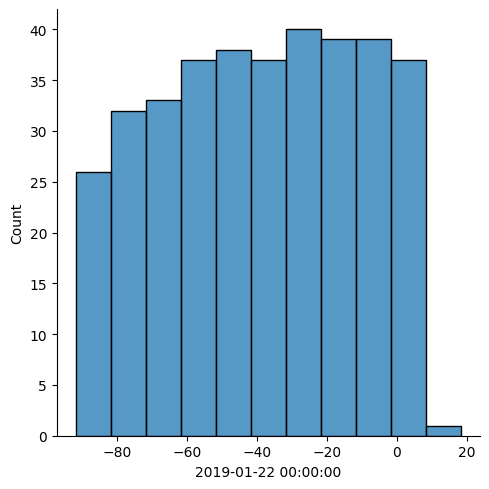

In [25]:
sns.displot( x=dftest2.iloc[: , -1], binwidth=10)

In [26]:
dftest2.index.size

359

In [27]:
for x in dftest2.iloc[: , -1].values:
    print(x)

-72.177
-67.707
-63.908
-83.407
-84.53
-69.494
-32.845
-91.734
-70.388
-85.424
-83.623
-78.227
-77.436
-80.681
-81.86
-32.261
-81.365
-75.168
-88.575
-80.773
-87.08
-23.922
-70.043
-87.615
-33.218
-76.039
-71.849
-23.327
-78.068
-28.408
-80.252
-90.127
-40.641
-86.433
-75.3
-86.939
-79.324
-79.979
-90.565
-87.208
-84.995
-18.78
-75.666
-86.05
-87.881
-90.781
-83.607
-27.164
-23.224
-77.14
-91.715
-18.927
-79.167
-69.739
-88.934
-65.962
-88.008
-90.255
-28.013
-24.858
-75.31
-40.945
-24.181
-76.514
-28.347
-21.503
-71.298
-55.531
-37.407
-74.367
-85.987
-27.485
-72.148
-66.525
-82.864
-55.034
-81.191
-88.242
-74.016
-71.307
-24.703
-81.446
-63.008
-48.611
-39.458
-72.325
-17.954
-68.781
-77.061
-55.815
-76.315
-70.363
-72.405
-80.581
-71.254
-50.58
-74.026
-78.838
-26.035
-69.417
-68.654
-62.187
-69.974
-70.248
-66.415
-65.478
-62.84
-47.179
-62.464
-65.106
-16.479
-45.232
-60.587
-66.1
-24.608
-51.321
-43.213
-50.024
-53.357
-58.34
-48.634
-21.84
-43.238
-16.752
-61.967
-56.767
-16.946

In [28]:
dftest2

,,2014-11-08,2014-12-02,2014-12-26,2015-02-12,2015-03-08,2015-04-01,2015-04-25,2015-05-19,2015-06-12,2015-07-06,...,2018-10-18,2018-10-30,2018-11-11,2018-11-17,2018-11-23,2018-12-05,2018-12-17,2018-12-29,2019-01-10,2019-01-22
Longitude,Latitude,,,,,,,,,,,,,,,,,,,,,
-119.5849,36.0572,0.0,-6.64080,-2.479900,-5.59470,-8.6473,-7.0502,-11.203000,-12.3800,-15.23500,-16.317000,...,-70.0960,-70.5040,-70.5900,-70.1110,-71.9380,-71.3450,-70.5530,-71.6290,-72.6650,-72.1770
-119.5769,36.0452,0.0,-6.43920,-1.633900,-4.82740,-7.6570,-5.4286,-9.573500,-10.8950,-14.01200,-14.834000,...,-65.8130,-66.2920,-66.3650,-65.8610,-67.6960,-66.9490,-66.0230,-67.2170,-68.4280,-67.7070
-119.5729,36.0972,0.0,-5.93340,-1.354100,-4.08680,-7.0178,-5.9148,-10.121000,-10.7450,-14.02100,-15.153000,...,-62.3490,-62.5570,-62.6650,-62.2120,-63.7060,-62.9170,-62.1280,-63.1850,-64.1610,-63.9080
-119.5489,36.0072,0.0,-6.98510,-2.425400,-5.59300,-8.2796,-7.1048,-11.352000,-13.1490,-16.28400,-17.528000,...,-80.4520,-81.3120,-81.3700,-81.0500,-82.8020,-81.8950,-80.9560,-82.2640,-83.5630,-83.4070
-119.5369,36.0472,0.0,-6.52240,-2.652600,-7.67760,-11.1110,-10.5900,-14.676000,-17.0200,-20.39000,-22.219000,...,-82.7120,-83.1190,-82.8720,-82.5070,-84.1300,-83.3090,-83.1980,-83.6720,-84.9170,-84.5300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-118.9351,35.9912,0.0,1.31960,-0.454550,-1.12980,-2.1960,-2.2949,0.732390,-2.6491,-0.57953,-0.463840,...,3.3119,2.4877,3.7906,3.6429,3.8131,2.7015,5.1692,5.8056,3.2722,3.7133
-118.9331,35.8431,0.0,-0.27523,0.340730,0.11561,-1.8977,-1.7240,1.244300,-2.6508,0.44136,0.072182,...,5.3406,4.6145,5.8431,5.6430,5.8181,5.7786,7.0684,8.0765,5.0210,5.4701
-118.9311,35.6111,0.0,-2.60280,0.000017,0.94402,-2.1042,-1.8717,0.510950,-2.7147,0.42639,0.334300,...,4.6175,4.2846,5.3261,5.0863,5.6278,4.1805,6.4902,7.5899,4.7841,5.1107


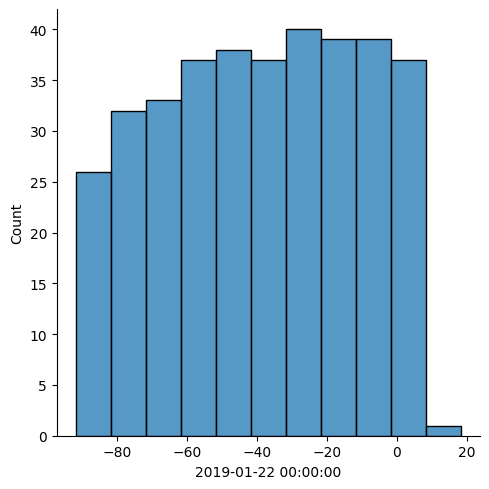

In [29]:
import seaborn as sns
sns.displot( x=dftest2.iloc[: , -1], binwidth=10)
# 60 20 20
#60% is my training 


In [31]:
#dftest2.to_csv('E:/DSFellowship/InSAR_data_south/displacement/training.csv')